In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.width', 5000)
pd.set_option('display.max_rows', 30)

plt.rcParams['figure.figsize'] = (15, 5)

In [10]:
stocks = pd.read_csv('./stock_data.csv', index_col=0, parse_dates=True)

In [11]:
!head -n 10 stock_data.csv

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [12]:
stocks

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [15]:
s1=stocks['AAPL'][1:10]
s2=stocks['AAPL'][12:14]
s2.append(s1)

2007-11-14    166.11
2007-11-15    164.30
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
2007-11-05    186.18
2007-11-06    191.79
2007-11-07    186.30
2007-11-08    175.47
2007-11-09    165.37
Name: AAPL, dtype: float64

In [16]:
s1.align(s2, join='right')

(2007-11-14   NaN
 2007-11-15   NaN
 Name: AAPL, dtype: float64, 2007-11-14    166.11
 2007-11-15    164.30
 Name: AAPL, dtype: float64)

In [17]:
stocks.apply(np.mean)

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [18]:
stocks.head(10).apply(np.mean, axis=1)

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
2007-11-05    233.175556
2007-11-06    236.181111
2007-11-07    229.647778
2007-11-08    228.185556
2007-11-09    223.683333
dtype: float64

In [19]:
stocks.mean(skipna=False)

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [20]:
stocks.head(10).mean(1)

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
2007-11-05    233.175556
2007-11-06    236.181111
2007-11-07    229.647778
2007-11-08    228.185556
2007-11-09    223.683333
dtype: float64

In [21]:
stocks.head(10).mean(1, )

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
2007-11-05    233.175556
2007-11-06    236.181111
2007-11-07    229.647778
2007-11-08    228.185556
2007-11-09    223.683333
dtype: float64

In [22]:
stocks.mean?

In [24]:
stocks.AAPL.idxmax()

Timestamp('2011-10-14 00:00:00')

In [25]:
stocks.apply(lambda x: x.min() - x.max())

AA      -36.76
AAPL   -343.80
GE      -28.78
IBM    -122.39
JNJ     -24.56
MSFT    -19.74
PEP     -28.79
SPX    -872.85
XOM     -32.63
dtype: float64

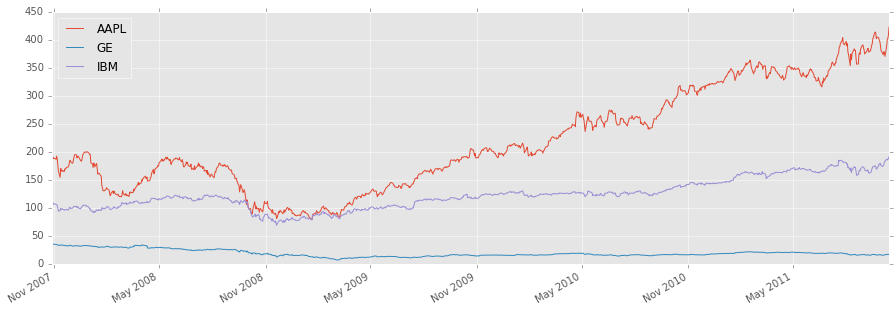

In [27]:
stocks[['AAPL', 'GE', 'IBM']].plot()

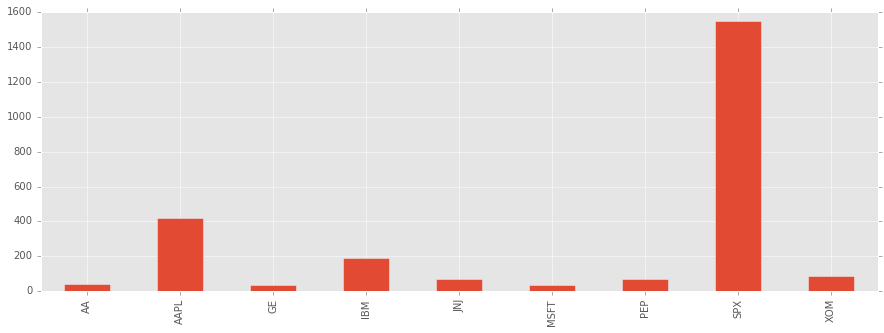

In [28]:
stocks.max().plot(kind='bar')